In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# visualize the dataset
df = pd.read_csv('/content/spam_ham_dataset.csv', encoding='latin-1')
df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# Clean the text data and get rid of (\r, \n) lines
df['text'] = df['text'].str.replace('\r', ' ')
df['text'] = df['text'].str.replace('\n', ' ')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291 th...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001 ( see a...",0
2,3624,ham,"Subject: neon retreat ho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs this deal is to ...,0


In [ ]:
# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label_num'], test_size=0.2, random_state=0)

In [ ]:
# find word count and store data as a matrix
# Transform the text data using CountVectorizer
count_vector = CountVectorizer()
data_train = count_vector.fit_transform(x_train.values)
data_test = count_vector.transform(x_test.values)

# the sparse matrix which is 4136 are thr rows of which how many messages are there
# and through those are 43727 unique words that appeared accross all those diffrent emails

In [ ]:
# training our model with multinomial naive bayes
md = MultinomialNB()
md.fit(data_train, y_train)

MultinomialNB()

In [ ]:
# Predicting on the test data
y_predict_train = md.predict(data_test)

In [ ]:
# Checking sizes to ensure consistency
print(f"Size of y_test: {len(y_test)}")
print(f"Size of y_predict_train: {len(y_predict_train)}")

Size of y_test: 1035
Size of y_predict_train: 1035


In [ ]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_predict_train)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_predict_train))

Confusion Matrix:
[[722  10]
 [ 18 285]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       732
           1       0.97      0.94      0.95       303

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [ ]:
# What is the spam percentage
print('Spam percentage:', round(df['label_num'].value_counts()[1] / len(df['label_num']) * 100), '%')
print(df['label_num'].value_counts())

Spam percentage: 29 %
label_num
0    3672
1    1499
Name: count, dtype: int64


In [ ]:
# What is the not_spam percentage...
print('Not spam percentage:', round(df['label_num'].value_counts()[0] / len(df['label_num']) * 100), '%')


Not spam percentage: 71 %


In [ ]:
labels = ['Non-Spam', 'Spam']
counts = df['label_num'].value_counts()  # Get the counts of each label


In [ ]:
# Extract counts for non-spam (0) and spam (1)
sizes = [counts[0], counts[1]]


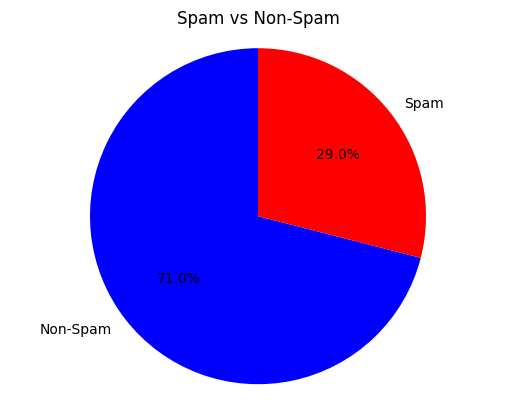

In [ ]:
# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.title('Spam vs Non-Spam')
plt.show()

In [ ]:
# pretest not spam email
not_spam_email = "Hey, wanna play FFIV tomorrow?"
not_spam_email_count = count_vector.transform([not_spam_email])
print(md.predict(not_spam_email_count)) # model predict

[0]


In [ ]:
# pretest the spam emails
# naive bayes can figure spam through word counts
spam_email = "Your account has been compromised. Please enter your personal information to secure it"
spam_email_count = count_vector.transform([spam_email])
print(md.predict(spam_email_count)) # model predict

[1]


In [ ]:
# testing the model
data_test = count_vector.transform(x_test)
print(md.score(data_test, y_test)) # score does all the predictions and mesures them against the actual testing data

0.9729468599033816
